In [1]:
import numpy as np
import torch
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.__version__

'0.4.0'

In [3]:
np.random.seed(1943)
torch.manual_seed(1943)

In [4]:
# setosa: (1,0,0)
# versicolor: (0,1,0)
# virginica: (0,0,1)
# Sepal length, Sepal width, Petal length, Petal width
iris = [((5.1, 3.5, 1.4, 0.2), (1, 0, 0)),
        ((4.9, 3.0, 1.4, 0.2), (1, 0, 0)),
        ((4.7, 3.2, 1.3, 0.2), (1, 0, 0)),
        ((4.6, 3.1, 1.5, 0.2), (1, 0, 0)),
        ((5.0, 3.6, 1.4, 0.2), (1, 0, 0)),
        ((5.4, 3.9, 1.7, 0.4), (1, 0, 0)),
        ((4.6, 3.4, 1.4, 0.3), (1, 0, 0)),
        ((5.0, 3.4, 1.5, 0.2), (1, 0, 0)),
        ((4.4, 2.9, 1.4, 0.2), (1, 0, 0)),
        ((4.9, 3.1, 1.5, 0.1), (1, 0, 0)),
        ((5.4, 3.7, 1.5, 0.2), (1, 0, 0)),
        ((4.8, 3.4, 1.6, 0.2), (1, 0, 0)),
        ((4.8, 3.0, 1.4, 0.1), (1, 0, 0)),
        ((4.3, 3.0, 1.1, 0.1), (1, 0, 0)),
        ((5.8, 4.0, 1.2, 0.2), (1, 0, 0)),
        ((5.7, 4.4, 1.5, 0.4), (1, 0, 0)),
        ((5.4, 3.9, 1.3, 0.4), (1, 0, 0)),
        ((5.1, 3.5, 1.4, 0.3), (1, 0, 0)),
        ((5.7, 3.8, 1.7, 0.3), (1, 0, 0)),
        ((5.1, 3.8, 1.5, 0.3), (1, 0, 0)),
        ((5.4, 3.4, 1.7, 0.2), (1, 0, 0)),
        ((5.1, 3.7, 1.5, 0.4), (1, 0, 0)),
        ((4.6, 3.6, 1.0, 0.2), (1, 0, 0)),
        ((5.1, 3.3, 1.7, 0.5), (1, 0, 0)),
        ((4.8, 3.4, 1.9, 0.2), (1, 0, 0)),
        ((5.0, 3.0, 1.6, 0.2), (1, 0, 0)),
        ((5.0, 3.4, 1.6, 0.4), (1, 0, 0)),
        ((5.2, 3.5, 1.5, 0.2), (1, 0, 0)),
        ((5.2, 3.4, 1.4, 0.2), (1, 0, 0)),
        ((4.7, 3.2, 1.6, 0.2), (1, 0, 0)),
        ((4.8, 3.1, 1.6, 0.2), (1, 0, 0)),
        ((5.4, 3.4, 1.5, 0.4), (1, 0, 0)),
        ((5.2, 4.1, 1.5, 0.1), (1, 0, 0)),
        ((5.5, 4.2, 1.4, 0.2), (1, 0, 0)),
        ((4.9, 3.1, 1.5, 0.1), (1, 0, 0)),
        ((5.0, 3.2, 1.2, 0.2), (1, 0, 0)),
        ((5.5, 3.5, 1.3, 0.2), (1, 0, 0)),
        ((4.9, 3.1, 1.5, 0.1), (1, 0, 0)),
        ((4.4, 3.0, 1.3, 0.2), (1, 0, 0)),
        ((5.1, 3.4, 1.5, 0.2), (1, 0, 0)),
        ((5.0, 3.5, 1.3, 0.3), (1, 0, 0)),
        ((4.5, 2.3, 1.3, 0.3), (1, 0, 0)),
        ((4.4, 3.2, 1.3, 0.2), (1, 0, 0)),
        ((5.0, 3.5, 1.6, 0.6), (1, 0, 0)),
        ((5.1, 3.8, 1.9, 0.4), (1, 0, 0)),
        ((4.8, 3.0, 1.4, 0.3), (1, 0, 0)),
        ((5.1, 3.8, 1.6, 0.2), (1, 0, 0)),
        ((4.6, 3.2, 1.4, 0.2), (1, 0, 0)),
        ((5.3, 3.7, 1.5, 0.2), (1, 0, 0)),
        ((5.0, 3.3, 1.4, 0.2), (1, 0, 0)),
        ((7.0, 3.2, 4.7, 1.4), (0, 1, 0)),
        ((6.4, 3.2, 4.5, 1.5), (0, 1, 0)),
        ((6.9, 3.1, 4.9, 1.5), (0, 1, 0)),
        ((5.5, 2.3, 4.0, 1.3), (0, 1, 0)),
        ((6.5, 2.8, 4.6, 1.5), (0, 1, 0)),
        ((5.7, 2.8, 4.5, 1.3), (0, 1, 0)),
        ((6.3, 3.3, 4.7, 1.6), (0, 1, 0)),
        ((4.9, 2.4, 3.3, 1.0), (0, 1, 0)),
        ((6.6, 2.9, 4.6, 1.3), (0, 1, 0)),
        ((5.2, 2.7, 3.9, 1.4), (0, 1, 0)),
        ((5.0, 2.0, 3.5, 1.0), (0, 1, 0)),
        ((5.9, 3.0, 4.2, 1.5), (0, 1, 0)),
        ((6.0, 2.2, 4.0, 1.0), (0, 1, 0)),
        ((6.1, 2.9, 4.7, 1.4), (0, 1, 0)),
        ((5.6, 2.9, 3.6, 1.3), (0, 1, 0)),
        ((6.7, 3.1, 4.4, 1.4), (0, 1, 0)),
        ((5.6, 3.0, 4.5, 1.5), (0, 1, 0)),
        ((5.8, 2.7, 4.1, 1.0), (0, 1, 0)),
        ((6.2, 2.2, 4.5, 1.5), (0, 1, 0)),
        ((5.6, 2.5, 3.9, 1.1), (0, 1, 0)),
        ((5.9, 3.2, 4.8, 1.8), (0, 1, 0)),
        ((6.1, 2.8, 4.0, 1.3), (0, 1, 0)),
        ((6.3, 2.5, 4.9, 1.5), (0, 1, 0)),
        ((6.1, 2.8, 4.7, 1.2), (0, 1, 0)),
        ((6.4, 2.9, 4.3, 1.3), (0, 1, 0)),
        ((6.6, 3.0, 4.4, 1.4), (0, 1, 0)),
        ((6.8, 2.8, 4.8, 1.4), (0, 1, 0)),
        ((6.7, 3.0, 5.0, 1.7), (0, 1, 0)),
        ((6.0, 2.9, 4.5, 1.5), (0, 1, 0)),
        ((5.7, 2.6, 3.5, 1.0), (0, 1, 0)),
        ((5.5, 2.4, 3.8, 1.1), (0, 1, 0)),
        ((5.5, 2.4, 3.7, 1.0), (0, 1, 0)),
        ((5.8, 2.7, 3.9, 1.2), (0, 1, 0)),
        ((6.0, 2.7, 5.1, 1.6), (0, 1, 0)),
        ((5.4, 3.0, 4.5, 1.5), (0, 1, 0)),
        ((6.0, 3.4, 4.5, 1.6), (0, 1, 0)),
        ((6.7, 3.1, 4.7, 1.5), (0, 1, 0)),
        ((6.3, 2.3, 4.4, 1.3), (0, 1, 0)),
        ((5.6, 3.0, 4.1, 1.3), (0, 1, 0)),
        ((5.5, 2.5, 4.0, 1.3), (0, 1, 0)),
        ((5.5, 2.6, 4.4, 1.2), (0, 1, 0)),
        ((6.1, 3.0, 4.6, 1.4), (0, 1, 0)),
        ((5.8, 2.6, 4.0, 1.2), (0, 1, 0)),
        ((5.0, 2.3, 3.3, 1.0), (0, 1, 0)),
        ((5.6, 2.7, 4.2, 1.3), (0, 1, 0)),
        ((5.7, 3.0, 4.2, 1.2), (0, 1, 0)),
        ((5.7, 2.9, 4.2, 1.3), (0, 1, 0)),
        ((6.2, 2.9, 4.3, 1.3), (0, 1, 0)),
        ((5.1, 2.5, 3.0, 1.1), (0, 1, 0)),
        ((5.7, 2.8, 4.1, 1.3), (0, 1, 0)),
        ((6.3, 3.3, 6.0, 2.5), (0, 0, 1)),
        ((5.8, 2.7, 5.1, 1.9), (0, 0, 1)),
        ((7.1, 3.0, 5.9, 2.1), (0, 0, 1)),
        ((6.3, 2.9, 5.6, 1.8), (0, 0, 1)),
        ((6.5, 3.0, 5.8, 2.2), (0, 0, 1)),
        ((7.6, 3.0, 6.6, 2.1), (0, 0, 1)),
        ((4.9, 2.5, 4.5, 1.7), (0, 0, 1)),
        ((7.3, 2.9, 6.3, 1.8), (0, 0, 1)),
        ((6.7, 2.5, 5.8, 1.8), (0, 0, 1)),
        ((7.2, 3.6, 6.1, 2.5), (0, 0, 1)),
        ((6.5, 3.2, 5.1, 2.0), (0, 0, 1)),
        ((6.4, 2.7, 5.3, 1.9), (0, 0, 1)),
        ((6.8, 3.0, 5.5, 2.1), (0, 0, 1)),
        ((5.7, 2.5, 5.0, 2.0), (0, 0, 1)),
        ((5.8, 2.8, 5.1, 2.4), (0, 0, 1)),
        ((6.4, 3.2, 5.3, 2.3), (0, 0, 1)),
        ((6.5, 3.0, 5.5, 1.8), (0, 0, 1)),
        ((7.7, 3.8, 6.7, 2.2), (0, 0, 1)),
        ((7.7, 2.6, 6.9, 2.3), (0, 0, 1)),
        ((6.0, 2.2, 5.0, 1.5), (0, 0, 1)),
        ((6.9, 3.2, 5.7, 2.3), (0, 0, 1)),
        ((5.6, 2.8, 4.9, 2.0), (0, 0, 1)),
        ((7.7, 2.8, 6.7, 2.0), (0, 0, 1)),
        ((6.3, 2.7, 4.9, 1.8), (0, 0, 1)),
        ((6.7, 3.3, 5.7, 2.1), (0, 0, 1)),
        ((7.2, 3.2, 6.0, 1.8), (0, 0, 1)),
        ((6.2, 2.8, 4.8, 1.8), (0, 0, 1)),
        ((6.1, 3.0, 4.9, 1.8), (0, 0, 1)),
        ((6.4, 2.8, 5.6, 2.1), (0, 0, 1)),
        ((7.2, 3.0, 5.8, 1.6), (0, 0, 1)),
        ((7.4, 2.8, 6.1, 1.9), (0, 0, 1)),
        ((7.9, 3.8, 6.4, 2.0), (0, 0, 1)),
        ((6.4, 2.8, 5.6, 2.2), (0, 0, 1)),
        ((6.3, 2.8, 5.1, 1.5), (0, 0, 1)),
        ((6.1, 2.6, 5.6, 1.4), (0, 0, 1)),
        ((7.7, 3.0, 6.1, 2.3), (0, 0, 1)),
        ((6.3, 3.4, 5.6, 2.4), (0, 0, 1)),
        ((6.4, 3.1, 5.5, 1.8), (0, 0, 1)),
        ((6.0, 3.0, 4.8, 1.8), (0, 0, 1)),
        ((6.9, 3.1, 5.4, 2.1), (0, 0, 1)),
        ((6.7, 3.1, 5.6, 2.4), (0, 0, 1)),
        ((6.9, 3.1, 5.1, 2.3), (0, 0, 1)),
        ((5.8, 2.7, 5.1, 1.9), (0, 0, 1)),
        ((6.8, 3.2, 5.9, 2.3), (0, 0, 1)),
        ((6.7, 3.3, 5.7, 2.5), (0, 0, 1)),
        ((6.7, 3.0, 5.2, 2.3), (0, 0, 1)),
        ((6.3, 2.5, 5.0, 1.9), (0, 0, 1)),
        ((6.5, 3.0, 5.2, 2.0), (0, 0, 1)),
        ((6.2, 3.4, 5.4, 2.3), (0, 0, 1)),
        ((5.9, 3.0, 5.1, 1.8), (0, 0, 1))]

feature = np.vstack([np.array(i[0]) for i in iris])
label = np.vstack([np.array(i[1]) for i in iris])

_x = feature[:, 2:4]  # use "Petal length" and "Petal width" only
_y = label
d = _x.shape[1]

x = torch.from_numpy(_x.astype(np.float32))
y = torch.from_numpy(np.argmax(_y, axis=1))

In [5]:
def torch_kron_prod(a, b):
    res = torch.einsum('ij,ik->ijk', [a, b])
    res = torch.reshape(res, [-1, np.prod(res.shape[1:])])
    return res

In [6]:
def torch_bin(x, cut_points, temperature=0.1):
    # x is a N-by-1 matrix (column vector)
    # cut_points is a D-dim vector (D is the number of cut-points)
    # this function produces a N-by-(D+1) matrix, each row has only one element being one and the rest are all zeros
    D = cut_points.shape[0]
    W = torch.reshape(torch.linspace(1.0, D + 1.0, D + 1), [1, -1])
    cut_points, _ = torch.sort(cut_points)  # make sure cut_points is monotonically increasing
    b = torch.cumsum(torch.cat([torch.zeros([1]), -cut_points], 0),0)
    h = torch.matmul(x, W) + b
    res = torch.exp(h-torch.max(h))
    res = res/torch.sum(res, dim=-1, keepdim=True)
    return h

In [7]:
def nn_decision_tree(x, cut_points_list, leaf_score, temperature=0.1):
    # cut_points_list contains the cut_points for each dimension of feature
    leaf = reduce(torch_kron_prod,
                  map(lambda z: torch_bin(x[:, z[0]:z[0] + 1], z[1], temperature), enumerate(cut_points_list)))
    return torch.matmul(leaf, leaf_score)

In [8]:
num_cut = [1, 1]  # "Petal length" and "Petal width"
num_leaf = np.prod(np.array(num_cut) + 1)
num_class = 3

In [9]:
cut_points_list = [torch.rand([i], requires_grad=True) for i in num_cut]

In [10]:
leaf_score = torch.rand([num_leaf, num_class], requires_grad=True)

In [11]:
loss_function = torch.nn.CrossEntropyLoss()

In [12]:
optimizer = torch.optim.Adam(cut_points_list + [leaf_score], lr=0.01)

In [13]:
for i in range(1000):
    optimizer.zero_grad()
    y_pred = nn_decision_tree(x, cut_points_list, leaf_score, temperature=0.1)
    loss = loss_function(y_pred, y)
    loss.backward()
    optimizer.step()
    if i % 200 == 0:
        print(loss.detach().numpy())
print('error rate %.2f' % (1-np.mean(np.argmax(y_pred.detach().numpy(), axis=1)==np.argmax(_y, axis=1))))

7.024673
0.69929487
0.16637163
0.13140534
0.12425865
error rate 0.04


In [14]:
sample_x0 = np.repeat(np.linspace(0, np.max(_x[:,0]), 100), 100).reshape(-1,1)
sample_x1 = np.tile(np.linspace(0, np.max(_x[:,1]), 100).reshape(-1,1), [100,1])
sample_x = np.hstack([sample_x0, sample_x1])
sample_y_pred = nn_decision_tree(torch.from_numpy(sample_x.astype(np.float32)), cut_points_list, leaf_score, temperature=0.1)
sample_label = np.argmax(sample_y_pred.detach().numpy(), axis=1)

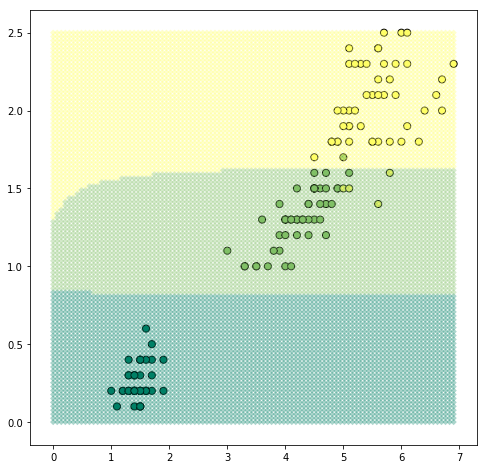

In [15]:
plt.figure(figsize=(8,8))

plt.scatter(_x[:,0], 
            _x[:,1], 
            c=np.argmax(_y, axis=1), 
            marker='o',
            s=50,
            cmap='summer', 
            edgecolors='black')

plt.scatter(sample_x0.flatten(), 
            sample_x1.flatten(), 
            c=sample_label.flatten(), 
            marker='D',
            s=20,
            cmap='summer', 
            edgecolors='none',
            alpha=0.33)